In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [3]:
from src.features import add_analytics_features
from src.modeling import train_models, logistic_coefficients
from src.config import RANDOM_STATE

In [4]:
df = pd.read_csv("outputs/telco_clean.csv")
df = add_analytics_features(df)

c:\Users\razan\Downloads\tel\src\features.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df["addon_service_count"] = df[ADDON_COLS].applymap(yes_to_1).sum(axis=1)


In [5]:
logreg_pipe, rf_pipe, lr_metrics, rf_metrics = train_models(df, random_state=RANDOM_STATE)


c:\Users\razan\Downloads\tel\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
print("LogReg ROC-AUC:", round(lr_metrics["roc_auc"], 4))
print(lr_metrics["confusion_matrix"])
print(lr_metrics["report"])

LogReg ROC-AUC: 0.8357
[[922 111]
 [175 199]]
              precision    recall  f1-score   support

           0     0.8405    0.8925    0.8657      1033
           1     0.6419    0.5321    0.5819       374

    accuracy                         0.7967      1407
   macro avg     0.7412    0.7123    0.7238      1407
weighted avg     0.7877    0.7967    0.7903      1407



<Figure size 640x480 with 0 Axes>

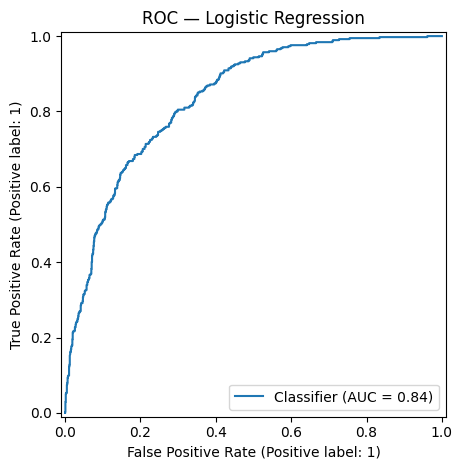

In [7]:
plt.figure()
RocCurveDisplay.from_predictions(lr_metrics["y_test"], lr_metrics["proba"])
plt.title("ROC — Logistic Regression")
plt.tight_layout()
plt.show()

In [8]:

print("RF ROC-AUC:", round(rf_metrics["roc_auc"], 4))
print(rf_metrics["confusion_matrix"])
print(rf_metrics["report"])


RF ROC-AUC: 0.8299
[[803 230]
 [ 99 275]]
              precision    recall  f1-score   support

           0     0.8902    0.7773    0.8300      1033
           1     0.5446    0.7353    0.6257       374

    accuracy                         0.7662      1407
   macro avg     0.7174    0.7563    0.7278      1407
weighted avg     0.7984    0.7662    0.7757      1407



In [9]:
coef_df = logistic_coefficients(logreg_pipe, df)
display(coef_df.head(15))
display(coef_df.tail(15))

,feature,coef
52,tenure_band_61-72,1.327845
51,tenure_band_49-60,0.779467
38,Contract_Month-to-month,0.766700
18,InternetService_Fiber optic,0.500800
50,tenure_band_37-48,0.283595
20,OnlineSecurity_No,0.283221
45,PaymentMethod_Electronic check,0.254995
29,TechSupport_No,0.252023
34,StreamingTV_Yes,0.189998
37,StreamingMovies_Yes,0.176606


,feature,coef
24,OnlineBackup_No internet service,-0.078548
33,StreamingTV_No internet service,-0.078548
13,PhoneService_Yes,-0.083344
6,SeniorCitizen_0,-0.087968
11,Dependents_Yes,-0.088066
43,PaymentMethod_Bank transfer (automatic),-0.108341
41,PaperlessBilling_No,-0.135079
31,TechSupport_Yes,-0.138352
22,OnlineSecurity_Yes,-0.169550
14,MultipleLines_No,-0.228233


<Figure size 1000x500 with 0 Axes>

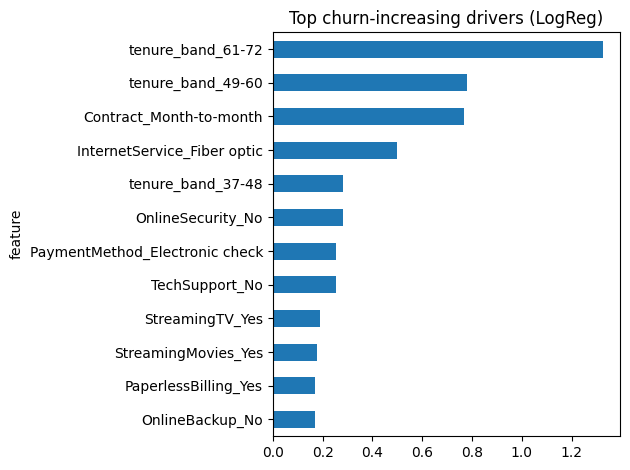

In [10]:
# Plot top drivers
topn = 12
plt.figure(figsize=(10, 5))
coef_df.head(topn).sort_values("coef").plot(x="feature", y="coef", kind="barh", legend=False)
plt.title("Top churn-increasing drivers (LogReg)")
plt.tight_layout()
plt.show()